# Lab 08: Deep Learning Part I: Fully Connected Neural Networks

In class, we have developed the mathematics and programming techniques for binary classification using fully connected neural networks
having one or more hidden layers.

Today, we'll expand on that to consider (small) image classification using again fully connected neural networks with a multinomial
(softmax) output layer.

In [1]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

'jupyter' is not recognized as an internal or external command,
operable program or batch file.


## What is Deep learning doing?

Let's try to classify the deep learning in this <link>[link](https://playground.tensorflow.org/
)</link>. The page can observe your network visualization when learning it.

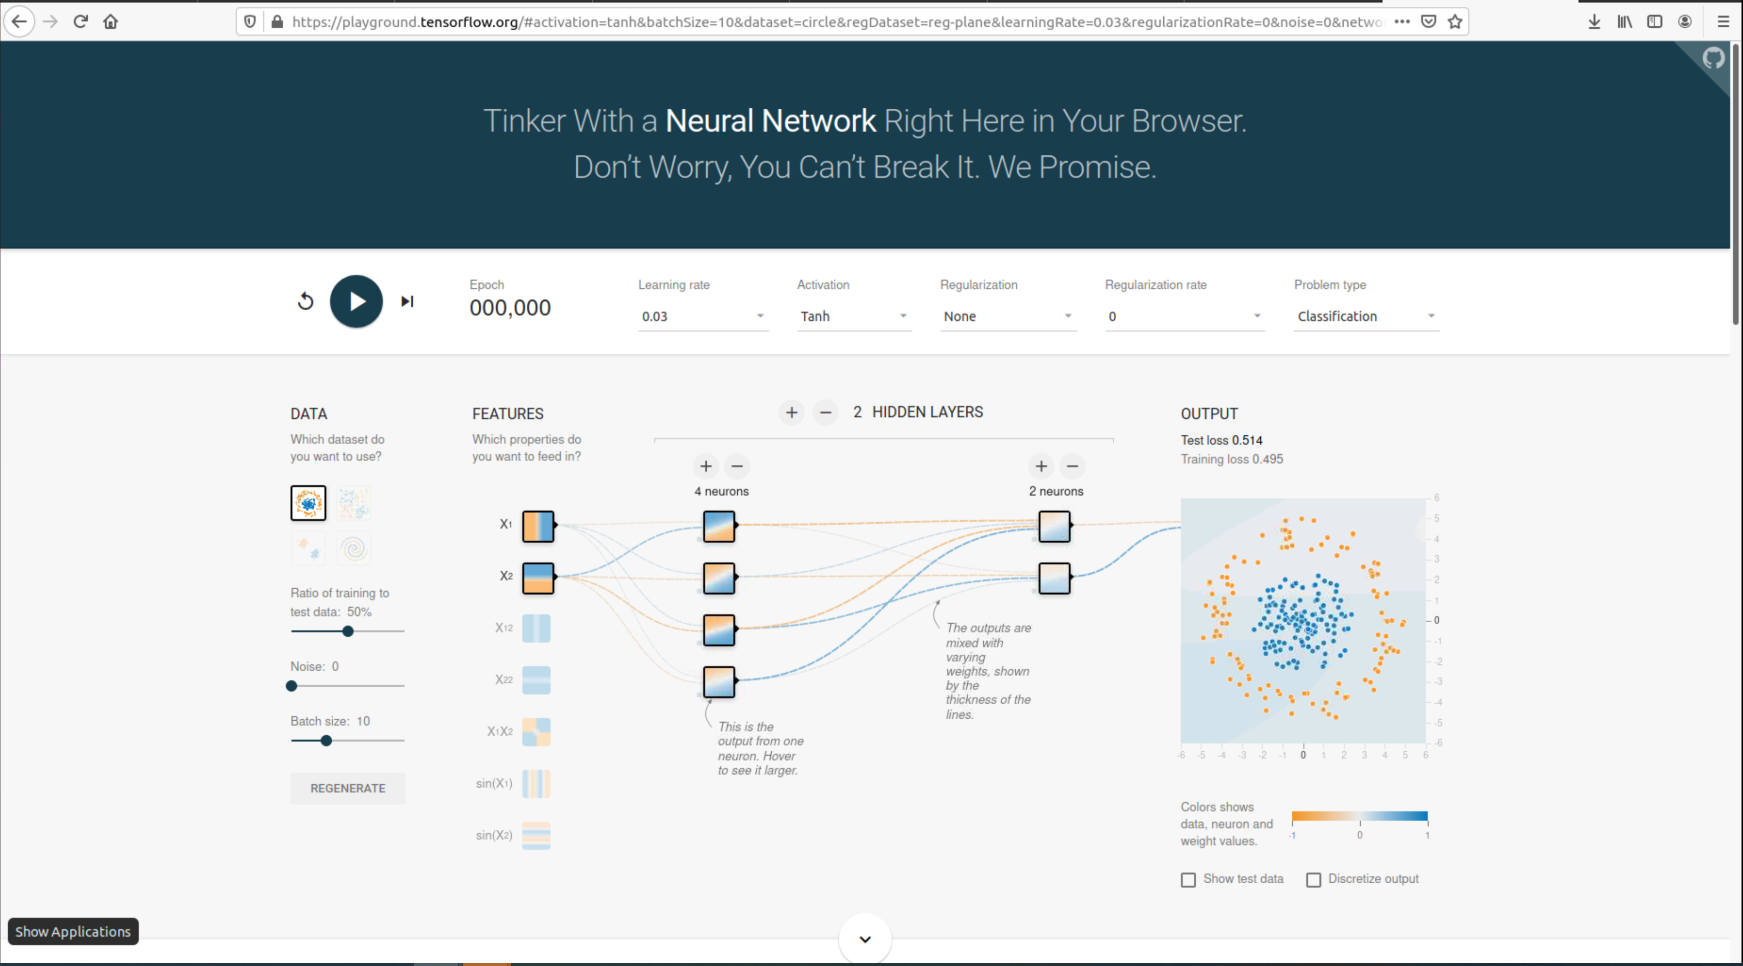

Select The initial setup of data (at the left) as:
- Ratio of training to test data: 90%
- Noise: 5
- Batch size: 4

Press run and observe the result.

## Exercise 1 (10 points)

Select the spiral shape (the 4th shape). Select The initial setup of data (at the left) as:
- Ratio of training to test data: 90%
- Noise: 35
- Batch size: 4

Try to make the best separating result. Capture your **FULL** screen and input below

Capture scrren here!

**Expect result**:

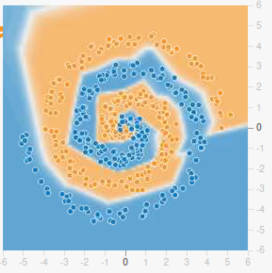

#### Special coding

You can make jupyter in GUI (it also can export to HTML website).

In [1]:
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

# defining some widgets
lblQ1 = widgets.Label(
        value="Q1) What is your learning rate?")
rdoQ1 = widgets.RadioButtons(
        options=['0.00001', '0.0001', '0.001', '0.003', '0.01', '0.03', '0.1', '0.3', '1', '3', '10',],
        value='0.03',
        description='\t',
        disabled=False)

lblQ2 = widgets.Label(
        value="Q2) What is your activation function in last layer?")
rdoQ2 = widgets.RadioButtons(
        options=['ReLu', 'Tanh', 'Sigmoid', 'Linear',],
        value='Tanh',
        description='\t',
        disabled=False)

lblQ3 = widgets.Label(
        value="Q3) What is problem type?")
rdoQ3 = widgets.RadioButtons(
        options=['Classification', 'Regression'],
        value='Classification',
        description='\t',
        disabled=False)

lblQ4 = widgets.Label(value="Q4) Which input do you use?")
chkQ4_1 = widgets.Checkbox(
           description='$X_1$',
           value=True)
chkQ4_2 = widgets.Checkbox(
           description='$X_2$',
           value=True)
chkQ4_3 = widgets.Checkbox(
           description='$X_1^2$',)
chkQ4_4 = widgets.Checkbox(
           description='$X_1X_2$',)
chkQ4_5 = widgets.Checkbox(
           description='$X_2^2$',)
chkQ4_6 = widgets.Checkbox(
           description='sin$(X_1)$',)
chkQ4_7 = widgets.Checkbox(
           description='sin$(X_2)$',)
chkQ4 = widgets.VBox([chkQ4_1, chkQ4_2, chkQ4_3, chkQ4_4, chkQ4_5, chkQ4_6, chkQ4_7])

lblQ5 = widgets.Label(value="Q5) How many hidden layers do you use?")
txtQ5 = widgets.IntText(
       value=0,
       description='hidden layers', )

lblQ6 = widgets.Label(value="Q6) Explain your nodes for each layer")
txtQ6 = widgets.Textarea(
       value='',
       description='Explain here', )

box = widgets.VBox([lblQ1, rdoQ1, lblQ2, rdoQ2, lblQ3, rdoQ3, lblQ4, chkQ4, lblQ5, txtQ5, lblQ6, txtQ6,])

box

In [25]:
q4str = ""
if chkQ4_1.value:
    q4str += " X1,"
if chkQ4_2.value:
    q4str += " X2,"
if chkQ4_3.value:
    q4str += " X1^2,"
if chkQ4_4.value:
    q4str += " X1X2,"
if chkQ4_5.value:
    q4str += " X2^2,"
if chkQ4_6.value:
    q4str += " sin(X1),"
if chkQ4_7.value:
    q4str += " sin(X2),"
print("Use input features:", q4str)
print("Problem type:", rdoQ3.value)
print("The last activation function:", rdoQ2.value)
print("Learning rate:", rdoQ1.value)
print("Use", txtQ5.value, "hidden layers. Each layer contains", txtQ6.value)

Use input features:  X1, X2,
Problem type: Classification
The last activation function: Tanh
Learning rate: 0.03
Use 0 hidden layers. Each layer contains 


![exercise1.png](attachment:exercise1.png)

## MNIST Data

An image is a 2D array of pixels. Pixels can be scalar intensities (for a grayscale / black and white image) or a vector indicating a
point in a color space such as RGB or HSV.

Today we'll consider 8x8 grayscale images of digits from the famous "MNIST" dataset, which was considered a benchmark for machine learning algorithms
up to the early 2000s, before the advent of large-scale image classification datasets.

This dataset in SciKit-Learn has 10 classes, with 180 samples per class in most cases, for a total of 1797 samples.

Let's load the dataset and check the y output.

In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load data

data = load_digits()

y_indices = data.target
print(y_indices[100])

4


## One hot encoding

As you can see, the y output is index value. To use the value for classify in deep learning, you need to convert it to one hot. 

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In this time, you need to convert the index value to be

$$0 \rightarrow [1, 0,0,0,0,0,0,0,0,0]$$
$$1  \rightarrow  [0, 1,0,0,0,0,0,0,0,0]$$
$$2  \rightarrow  [0, 0,1,0,0,0,0,0,0,0]$$
$$3  \rightarrow  [0, 0,0,1,0,0,0,0,0,0]$$
$$4  \rightarrow  [0, 0,0,0,1,0,0,0,0,0]$$
$$5  \rightarrow  [0, 0,0,0,0,1,0,0,0,0]$$
$$6  \rightarrow  [0, 0,0,0,0,0,1,0,0,0]$$
$$7  \rightarrow  [0, 0,0,0,0,0,0,1,0,0]$$
$$8  \rightarrow  [0, 0,0,0,0,0,0,0,1,0]$$
$$9  \rightarrow  [0, 0,0,0,0,0,0,0,0,1]$$

In [2]:
def convert_to_one_hot(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, int(y[i])] = 1
    return y_vect

# Convert target indices to one-hot representation
y = convert_to_one_hot(y_indices)
print(y[100])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Let's see the X input shape.

In [3]:
X = np.matrix(data.data)
print(X.shape)

(1797, 64)


You can see that the row number is the index of mnist data, and the column number is the mnist data of 64 pixels which is ready for using it as the fully connect network. To show the image, you need to reshape the 64 pixels to be $8\times8$.

Text(0.5, 1.0, 'Example MNIST sample (category 0)')

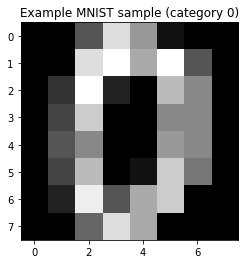

In [19]:
data_size = X.shape[0]
x_area = X.shape[1]

# Plot an example
plt.imshow(np.reshape(X[0,:],(8,8)), 'gray')
plt.title('Example MNIST sample (category %d)' % y_indices[0])

##  Reshaping arrays

Actually, normally when you load an image to use in your fully-connect neural network, you need to reshape the image arrays into vector of shape $(length\times height \times depth, 1)$ as example below.

<img src="image2vector_kiank.png" title="image2vector_kiank" style="width: 600px;" />

Two common numpy functions used in reshape are np.shape and np.reshape().

- <code>X.shape</code> is used to get the shape (dimension) of a matrix/vector $X$.
- <code>X.reshape(...)</code> is used to reshape $X$ into some other dimension.

In [20]:
def image2vector(image):
    """
    Convert image with 3 dimensions to become vector of (size, 1)
    """
    v = image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
    # v = image.reshape(-1,1)       # another one solution
    return v

image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


## Hand-Coded Fully Connected Neural Network

Let's modify our code from class to work with this dataset and run 100 epochs of training.
The main change is to use a one-hot encoding of the 10 classes at the output layer and to use
the softmax activation function at the output. Some minor changes are required to calculate multinomial
cross entropy loss rather than binary cross entropy loss.

<img src="nn_mnist.jpeg" title="mnist neural network" style="width: 600px;" />

*Note*: change SoftMin to be SoftMax

In [4]:
import random
import warnings
import copy
warnings.filterwarnings("ignore")

#### Normalize each input feature

Change the input X to be normalize vector. The normalize equation is

$$norm(X) = \frac{X-\bar{X}}{SD}$$

In [22]:
def normalize(X):
    M = X.shape[0]
    XX = X - np.tile(np.mean(X,0),[M,1])
    XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
    return np.nan_to_num(XX, copy=True,nan=0.0)

XX = normalize(X)

#### Partion data into training and testing dataset

In deep learning, it is necessary for split your raw data to be 3 types:
1. Training set - Data for training and learn
2. Validate set - Data for test the network in each epoch or loop training.
3. Test set - Data for test the network in finalize after training. This can assume that if the network is going to use, what accuracy should be.

Spliting the training, validate, and test set need to make sure that
1. The data need to be random.
2. The validate and test set must be in the same as training set environment, but do not the same data from training set.
3. A lot of data of training set can make your model accurate, but need to make sure that the validate and test set cover your conditions.

Normally, we should split data in percentage. However, this is not fixed. You can adjust.
- 60% training, 20% validate, and 20% test for the data over 1 million set
- 80% training, 10% validate, and 10% test for otherwise.
- For the very low data (~1000 data), we could use validate and test set in the same data.

However, there are some trick about spliting the data when the data is too low, but we do not talk about it in here.

In [23]:
percent_train = .6

idx = np.arange(0,data_size)

random.shuffle(idx)
m_train = int(data_size * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:data_size+1]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];
y_test_indices = y_indices[test_idx]

#### Create some important activation functions

ReLu equation is written

$$ReLu(x) = \max(0,x)$$

Tanh equation is written

$$Tanh(x) = \frac{e^{-x}-e^{-x}}{e^{-x}+e^{-x}}$$

Sigmoid equation is written

$$Sigmoid(x) = \frac{1}{1+e^{-x}}$$

And Softmax equation is written

$$Softmax(x) = softmax([x_1,x_2,\cdots,x_n])=
\begin{bmatrix}
\frac{e^{x_1}}{\sum_j e^{x_j}} & \frac{e^{x_2}}{\sum_j e^{x_j}} & \cdots & \frac{e^{x_n}}{\sum_j e^{x_j}}
\end{bmatrix}$$

In [9]:
def ReLu(x):
    output = np.maximum(0,x)
    return output

def Tanh(x):
    x_p = np.exp(x)
    x_m = np.exp(-x)
    output = (x_p - x_m) / (x_p + x_m)
    return output

def Sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

def Softmax(x):
    exp_x = np.exp(x)
    output = exp_x/np.sum(exp_x)
    return output

#### Create network

Let's start with a 3-layer network with sigmoid activation functions, \
6 units in layer 1, and 5 units in layer 2.

In [25]:
h2 = 5
h1 = 6
W = [[], np.random.normal(0,0.1,[x_area,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,10])]
B = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[10,1])]

act_funcs = [None, ReLu, Sigmoid, Softmax]

L = len(W)-1

#### Create Forward activation function

For input $x^{(i)}$, the forward propagation in each layer can be calculated by
$$z^{(i)}=W^Tx^{(i)}+b$$
$$\hat{y}^{(i)}=a^{(i)}=act(z^{(i)})$$

In [26]:
def forward_layer(w, b, X, act_func):
    z = w.T * X + b
    if act_func is not None:
        y_hat = act_func(z)
    else:
        y_hat = z
    return z, y_hat

In [27]:
# test function
X = np.array([[.9, 0.2, 0.1, -0.3, -0.7]]).T

w = np.array([[0.2, 0.1, 1, 3, 0.5]])
b = np.array([[1]])

z2, y_hat1 = forward_layer(w, 0.5, X, None)
z1, y_hat2 = forward_layer(w, b, X, Sigmoid)
z2, y_hat3 = forward_layer(w, 0.5, X, ReLu)
print('Linear output of y_hat1', y_hat1, ', y_hat2', y_hat2, 'and y_hat3', y_hat2)

Linear output of y_hat1 [[ 0.68]
 [ 0.52]
 [ 0.6 ]
 [-0.4 ]
 [ 0.15]] , y_hat2 [[0.7649478 ]
 [0.7349726 ]
 [0.75026011]
 [0.52497919]
 [0.65701046]] and y_hat3 [[0.7649478 ]
 [0.7349726 ]
 [0.75026011]
 [0.52497919]
 [0.65701046]]


#### Forward propagation

In [28]:
def forward_one_step(X, W, B, act_funcs):
    L = len(W)-1
    a = [X]
    z = [[]]
    delta = [[]]
    dW = [[]]
    db = [[]]
    for l in range(1,L+1):
        z_layer, a_layer = None, None
        ### BEGIN SOLUTION
        z_layer, a_layer = forward_layer(W[l], B[l], a[l-1], act_funcs[l])
        ### END SOLUTION
        z.append(z_layer)
        a.append(a_layer)
        # Just to give arrays the right shape for the backprop step
        delta.append([]); dW.append([]); db.append([])
    return a, z, delta, dW, db

In [29]:
def feed_forward(X,W,B, act_funcs):
    L = len(W)-1
    a = [X]
    z = [[]]
    delta = [[]]
    dW = [[]]
    db = [[]]
    for l in range(1,L+1):
        z_layer, a_layer = forward_layer(W[l], B[l], a[l-1], act_funcs[l])
        z.append(z_layer)
        a.append(a_layer)
    return a_layer

In [30]:
# test function

x_this = X_train[0,:].T

a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)
print('size of a', len(a), 'a[3] =', a[3])
print('size of z', len(z), 'z[3] =', z[3])

size of a 4 a[3] = [[0.10654168]
 [0.08123711]
 [0.09906337]
 [0.07069154]
 [0.09893176]
 [0.09875384]
 [0.10429732]
 [0.11439741]
 [0.11667182]
 [0.10941417]]
size of z 4 z[3] = [[ 0.1046007 ]
 [-0.16656339]
 [ 0.03182415]
 [-0.30560964]
 [ 0.03049481]
 [ 0.02869469]
 [ 0.0833101 ]
 [ 0.17574287]
 [ 0.19542945]
 [ 0.13120482]]


## Loss function

For softmax loss function, it is cross entropy loss. You can calculate as

$$\mathcal{L} = -\sum_{i=0}^n (y_i * \log\hat{y}_i)$$

In [31]:
def loss(y, yhat):
    l = - np.dot(y, np.log(yhat))
    return l

### Back propagation

Back propagation can be calculated as

$$\frac{\partial\mathcal{L}}{\partial z^{[l-1]} } =[W^{[l]}]^T \cdot \frac{ \partial\mathcal{L} }{\partial z^{[l]} } * {g^{[l-1]}}'(z^{[l-1]})$$

$$\frac{\partial\mathcal{L}}{\partial W^{[l]} } = \frac{ \partial\mathcal{L} }{\partial z^{[l]} } \cdot [a^{[l-1]}]^T$$

$$\frac{\partial\mathcal{L}}{\partial b^{[l]} } = \frac{ \partial\mathcal{L} }{\partial z^{[l]} }$$

When ${g^{[l-1]}}'$ is derivative activation function.

### derivative activation functions

First step of back propagation function, we need to calculate derivative of the activation functions that we use.

The Linear_derivative ($dl$) function is
$$dl(x) = [1]$$

The ReLu_derivative ($dReLu$) function is

$$dReLu(x)=
\left\{\begin{matrix}
1 & x > 0\\ 
0 & otherwise
\end{matrix}\right.$$

The Tanh_derivative ($dTanh$) function is

$$d\tanh(x) = 1 - \tanh^2(x)$$

The Sigmoid_derivative ($ds$) function is

$$dSigmoid(x) = Sigmoid(x)(1-Sigmoid(x))$$


In [32]:
def Linear_derivative(x):
    output = np.ones(x.shape)
    return output

def ReLu_derivative(x):
    output = (x > 0) * 1
    return output

def Tanh_derivative(x):
    t=Tanh(x)
    output = 1-t**2
    
    return output

def Sigmoid_derivative(x):
    s=Sigmoid(x)
    output = np.multiply(s,1-s)
    return output

#### Back propagation function

In [33]:
def back_propagation(y, a, z, W, dW, db, act_deri):
    '''
    Backprop step. Note that derivative of multinomial cross entropy
    loss is the same as that of binary cross entropy loss. See
    https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba
    for a nice derivation.
    '''
    L = len(W)-1
    
    delta[L] = a[L] - np.matrix(y_this).T
    for l in range(L,0,-1):
        db[l] = delta[l].copy()
        dW[l] = a[l-1] * delta[l].T
        if l > 1:
            delta[l-1] = np.multiply(act_deri[l-1](z[l-1]), W[l] * delta[l])
            
    return dW, db

Let's setup derivative activation function.

In [34]:
act_deri = [None, ReLu_derivative, Sigmoid_derivative, Softmax]

In [35]:
# test function
x_this = X_train[0,:].T
y_this = y_train[0,:]

a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)
dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)

lenW = [0, 64, 6, 5]
for i in range(4):
    assert len(dW[i]) == lenW[i]
    
print("dW", dW)
print("db", db)

dW [[], matrix([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.93318319e-04, -2.29451674e-04, -1.56133494e-03,
          0.00000000e+00,  2.22422431e-03,  0.00000000e+00],
        [ 6.31823680e-04, -7.49918591e-04, -5.10292243e-03,
          0.00000000e+00,  7.26944863e-03,  0.00000000e+00],
        [-2.93999777e-04,  3.48951623e-04,  2.37448849e-03,
          0.00000000e+00, -3.38261503e-03,  0.00000000e+00],
        [-2.89708347e-04,  3.43858076e-04,  2.33982876e-03,
          0.00000000e+00, -3.33323997e-03,  0.00000000e+00],
        [ 4.87097442e-04, -5.78141401e-04, -3.93404132e-03,
          0.00000000e+00,  5.60430060e-03,  0.00000000e+00],
        [ 2.36427587e-04, -2.80618546e-04, -1.90950683e-03,
          0.00000000e+00,  2.72021808e-03,  0.00000000e+00],
        [ 7.21433788e-05, -8.56277831e-05, -5.82665825e-04,
          0.00000000e+00,  8.30045790e-04,  0.00000000e+00],
        [ 3.40901850e-05

### Update weight and bias

In the training, to improve accuracy, you need to update weight/bias while training.
Weight and bias update equations are
$$
W_{new}^{(i)} = W_{old}^{(i)} - \alpha * \delta W
$$
$$
B_{new}^{(i)} = B_{old}^{(i)} - \alpha * \delta B
$$

When $\alpha$ is learning rate. and $i$ is the layer number of network


In [36]:
def update_step(W, B, dW, db, alpha):
    L = len(W)-1
    for l in range(1,L+1):
        W[l] = W[l] - alpha * dW[l]
        B[l] = B[l] - alpha * db[l]
    return W, B

### Put them together

Train for 100 epochs with mini-batch size 1

In [37]:
cost_arr = [] 

alpha = 0.01
max_iter = 100
for iter in range(0, max_iter):
    loss_this_iter = 0
    # random index of m_train
    order = np.random.permutation(m_train)
    for i in range(0, m_train):
        # Grab the pattern order[i]
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]
        
        # Feed forward step
        a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)
            
        # calulate loss
        loss_this_pattern = loss(y_this, a[L])
        loss_this_iter = loss_this_iter + loss_this_pattern
        
        # back propagation
        dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)
        
        # update weight, bias
        W, B = update_step(W, B, dW, db, alpha)
            
    print('Epoch %d train loss %f' % (iter, loss_this_iter[0,0]))
    cost_arr.append(loss_this_iter[0,0])

Epoch 0 train loss 2490.890127
Epoch 1 train loss 2479.336704
Epoch 2 train loss 2455.150760
Epoch 3 train loss 2344.429301
Epoch 4 train loss 2118.368220
Epoch 5 train loss 1887.809401
Epoch 6 train loss 1704.208781
Epoch 7 train loss 1559.124802
Epoch 8 train loss 1450.145143
Epoch 9 train loss 1368.306245
Epoch 10 train loss 1297.314206
Epoch 11 train loss 1230.501351
Epoch 12 train loss 1163.350896
Epoch 13 train loss 1096.333457
Epoch 14 train loss 1006.276466
Epoch 15 train loss 912.199869
Epoch 16 train loss 835.662697
Epoch 17 train loss 766.974116
Epoch 18 train loss 708.524664
Epoch 19 train loss 661.680887
Epoch 20 train loss 612.424122
Epoch 21 train loss 581.311013
Epoch 22 train loss 539.225719
Epoch 23 train loss 511.270163
Epoch 24 train loss 477.968624
Epoch 25 train loss 449.194968
Epoch 26 train loss 422.147758
Epoch 27 train loss 395.650261
Epoch 28 train loss 378.492022
Epoch 29 train loss 354.057853
Epoch 30 train loss 343.577501
Epoch 31 train loss 322.520614
Epo

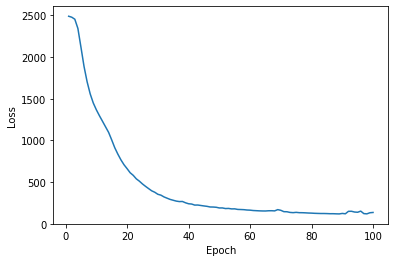

In [38]:
plt.plot(np.arange(1,max_iter+1,1), cost_arr)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Get test set accuracy

In [39]:
def predict_y(W, b, X):
    M = X.shape[0]
    y_pred = np.zeros(M)
    for i in range(X.shape[0]):
        y_pred[i] = np.argmax(feed_forward(X[i,:].T, W, B, act_funcs))
    return y_pred

y_test_predicted = predict_y(W, B, X_test)
y_correct = y_test_predicted == y_test_indices
test_accuracy = np.sum(y_correct) / len(y_correct)

print('Test accuracy: %.4f' % (test_accuracy))

Test accuracy: 0.8707


## In-class exercise (40 points)

Modify the code above to plot both training loss and test loss as a function of epoch number.
Use early stopping to obtain the best model according to the validation set.
Experiment with the hyperparameters (learning rate, number of layers, number of units per layer) to get
the best result you can.

- Do at least 3 examples
- Plot graphs
- Tell the validation accuracy
- Describe your experiments and results in your lab report.

In [28]:
def ReLu(x):
    output = np.maximum(0,x)
    return output

def Tanh(x):
    x_p = np.exp(x)
    x_m = np.exp(-x)
    output = (x_p - x_m) / (x_p + x_m)
    return output

def Sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

def Softmax(x):
    exp_x = np.exp(x)
    output = exp_x/np.sum(exp_x)
    return output

def forward_layer(w, b, X, act_func):
    z = w.T * X + b
    if act_func is not None:
        y_hat = act_func(z)
    else:
        y_hat = z
    return z, y_hat

def forward_one_step(X, W, B, act_funcs):
    L = len(W)-1
    a = [X]
    z = [[]]
    delta = [[]]
    dW = [[]]
    db = [[]]
    for l in range(1,L+1):
        z_layer, a_layer = None, None
        ### BEGIN SOLUTION
        z_layer, a_layer = forward_layer(W[l], B[l], a[l-1], act_funcs[l])
        ### END SOLUTION
        z.append(z_layer)
        a.append(a_layer)
        # Just to give arrays the right shape for the backprop step
        delta.append([]); dW.append([]); db.append([])
    return a, z, delta, dW, db

def feed_forward(X,W,B, act_funcs):
    L = len(W)-1
    a = [X]
    z = [[]]
    delta = [[]]
    dW = [[]]
    db = [[]]
    for l in range(1,L+1):
        z_layer, a_layer = forward_layer(W[l], B[l], a[l-1], act_funcs[l])
        z.append(z_layer)
        a.append(a_layer)
    return a_layer

def loss(y, yhat):
    l = - np.dot(y, np.log(yhat))
    return l

def Linear_derivative(x):
    output = np.ones(x.shape)
    return output

def ReLu_derivative(x):
    output = (x > 0) * 1
    return output

def Tanh_derivative(x):
    t=Tanh(x)
    output = 1-t**2
    
    return output

def Sigmoid_derivative(x):
    s=Sigmoid(x)
    output = np.multiply(s,1-s)
    return output

def back_propagation(y, a, z, W, dW, db, act_deri):
    '''
    Backprop step. Note that derivative of multinomial cross entropy
    loss is the same as that of binary cross entropy loss. See
    https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba
    for a nice derivation.
    '''
    L = len(W)-1
    
    delta[L] = a[L] - np.matrix(y_this).T
    for l in range(L,0,-1):
        db[l] = delta[l].copy()
        dW[l] = a[l-1] * delta[l].T
        if l > 1:
            delta[l-1] = np.multiply(act_deri[l-1](z[l-1]), W[l] * delta[l])
            
    return dW, db

def update_step(W, B, dW, db, alpha):
    L = len(W)-1
    for l in range(1,L+1):
        W[l] = W[l] - alpha * dW[l]
        B[l] = B[l] - alpha * db[l]
    return W, B

def predict_y(W, b, X):
    M = X.shape[0]
    y_pred = np.zeros(M)
    for i in range(X.shape[0]):
        y_pred[i] = np.argmax(feed_forward(X[i,:].T, W, B, act_funcs))
    return y_pred

Epoch 0 train loss 2487.871147 validate loss 1657.599909
Epoch 1 train loss 2484.215666 validate loss 1652.576777
Epoch 2 train loss 2470.044395 validate loss 1636.266925
Epoch 3 train loss 2421.616267 validate loss 1581.782430
Epoch 4 train loss 2305.928212 validate loss 1476.506267
Epoch 5 train loss 2105.674600 validate loss 1333.198063
Epoch 6 train loss 1902.394224 validate loss 1221.124001
Epoch 7 train loss 1744.484088 validate loss 1129.971606
Epoch 8 train loss 1617.290556 validate loss 1058.840627
Epoch 9 train loss 1510.105684 validate loss 993.883183
Epoch 10 train loss 1417.115202 validate loss 943.895758
Epoch 11 train loss 1341.437199 validate loss 892.487978
Epoch 12 train loss 1274.902990 validate loss 850.128033
Epoch 13 train loss 1216.429884 validate loss 819.125683
Epoch 14 train loss 1162.663571 validate loss 785.711502
Epoch 15 train loss 1115.376590 validate loss 762.263173
Epoch 16 train loss 1068.320574 validate loss 731.116878
Epoch 17 train loss 1024.855547 

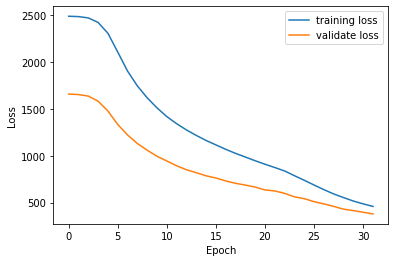

Test accuracy: 0.8178 for alpha =0.01


In [33]:
# modify your code here
# Normalize each input feature
def normalize(X):
    M = X.shape[0]
    XX = X - np.tile(np.mean(X,0),[M,1])
    XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
    return np.nan_to_num(XX, copy=True,nan=0.0)
    
X = np.matrix(data.data)
XX = normalize(X)
M,N = X.shape
idx = np.arange(0,M)

# Partion data into training and testing dataset
random.shuffle(idx)
percent_train = .6
m_train = int(M * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:M+1]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];
y_test_indices = y_indices[test_idx]

# Let's start with a 3-layer network with sigmoid activation functions,
# 6 units in layer 1, and 5 units in layer 2.

h2 = 5
h1 = 6
W = [[], np.random.normal(0,0.1,[N,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,10])]
b = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[10,1])]
L = len(W)-1

act_funcs = [None, ReLu, Sigmoid, Softmax]
act_deri = [None, ReLu_derivative, Sigmoid_derivative, Softmax]

copy_w = None
copy_b = None
loss_tol = 10
wait_iteration = 5
best_val_loss = 0
best_val_loss_idx = 0
tolerance = 30

# Train for 100 epochs with mini-batch size 1
cost_arr = [] 
val_loss_arr = []

alpha = 0.01
max_iter = 100
for iter in range(0, max_iter):
    loss_this_iter = 0
    # random index of m_train
    order = np.random.permutation(m_train)
    for i in range(0, m_train):
        # Grab the pattern order[i]
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]
        
        # Feed forward step
        a, z, delta, dW, db = forward_one_step(x_this, W, b, act_funcs)
            
        # calulate loss
        loss_this_pattern = loss(y_this, a[L])
        loss_this_iter = loss_this_iter + loss_this_pattern
        
        # back propagation
        dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)
        
        # update weight, bias
        W, B = update_step(W, b, dW, db, alpha)

    val_loss = 0
    for i in range(X_test.shape[0]):
        y_val = feed_forward(X_test[i,:].T, W, b, act_funcs) 
        y_val = np.array(y_val).flatten()
        val_loss += loss(y_test[i, :], y_val)

    print('Epoch %d train loss %f validate loss %f' % (iter, loss_this_iter[0,0], val_loss))

    if val_loss < best_val_loss or best_val_loss == 0 :
        copy_w, copy_b = copy.deepcopy(W), copy.deepcopy(b)
        best_val_loss = val_loss
        best_val_loss_idx = iter-1

    if iter>= tolerance + 1:
        if iter % wait_iteration == 0:
            alpha *= 0.5
        if val_loss > best_val_loss:
            W, b = copy_w, copy_b
            print(f'Stop training at iter: {iter}')
            print(f'Using best validation loss from epoch: {best_val_loss}')
            print(f'Train loss : {cost_arr[best_val_loss_idx]} Validate loss : {best_val_loss}')
            break

    cost_arr.append(loss_this_iter[0,0])
    val_loss_arr.append(val_loss)

xd = np.arange(len(cost_arr))
plt.plot(xd, cost_arr, label='training loss')
plt.plot(xd, val_loss_arr, label='validate loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

y_test_predicted = predict_y(W, B, X_test)
y_correct = y_test_predicted == y_test_indices
test_accuracy = np.sum(y_correct) / len(y_correct)

print('Test accuracy: %.4f for alpha =0.01' % (test_accuracy))

Epoch 0 train loss 2095.983060 validate loss 959.363107
Epoch 1 train loss 1044.387089 validate loss 634.763693
Epoch 2 train loss 793.693345 validate loss 497.711672
Epoch 3 train loss 707.232964 validate loss 450.558332
Epoch 4 train loss 751.221476 validate loss 612.287024
Epoch 5 train loss 886.140226 validate loss 447.262237
Epoch 6 train loss 591.275442 validate loss 535.593089
Epoch 7 train loss 813.649263 validate loss 568.559189
Epoch 8 train loss 716.528331 validate loss 483.125947
Epoch 9 train loss 638.764163 validate loss 624.432037
Epoch 10 train loss 1053.176933 validate loss 738.203018
Epoch 11 train loss 894.582324 validate loss 592.285418
Epoch 12 train loss 796.019708 validate loss 624.637568
Epoch 13 train loss 935.026859 validate loss 611.628501
Epoch 14 train loss 887.652096 validate loss 628.866174
Epoch 15 train loss 780.553165 validate loss 523.995427
Epoch 16 train loss 693.959185 validate loss 565.200373
Epoch 17 train loss 683.172264 validate loss 554.061396

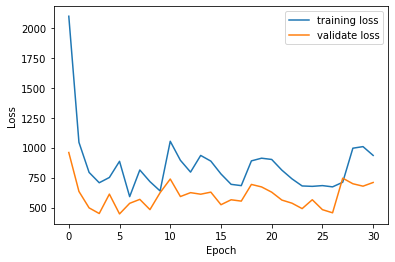

Test accuracy: 0.6940 for alpha =0.1


In [34]:
# modify your code here
# Normalize each input feature
def normalize(X):
    M = X.shape[0]
    XX = X - np.tile(np.mean(X,0),[M,1])
    XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
    return np.nan_to_num(XX, copy=True,nan=0.0)
    
X = np.matrix(data.data)
XX = normalize(X)
M,N = X.shape
idx = np.arange(0,M)

# Partion data into training and testing dataset
random.shuffle(idx)
percent_train = .6
m_train = int(M * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:M+1]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];
y_test_indices = y_indices[test_idx]

# Let's start with a 3-layer network with sigmoid activation functions,
# 6 units in layer 1, and 5 units in layer 2.

h2 = 5
h1 = 6
W = [[], np.random.normal(0,0.1,[N,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,10])]
b = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[10,1])]
L = len(W)-1

act_funcs = [None, ReLu, Sigmoid, Softmax]
act_deri = [None, ReLu_derivative, Sigmoid_derivative, Softmax]

copy_w = None
copy_b = None
loss_tol = 10
wait_iteration = 5
best_val_loss = 0
best_val_loss_idx = 0
tolerance = 30

# Train for 100 epochs with mini-batch size 1
cost_arr = [] 
val_loss_arr = []

alpha = 0.1
max_iter = 100
for iter in range(0, max_iter):
    loss_this_iter = 0
    # random index of m_train
    order = np.random.permutation(m_train)
    for i in range(0, m_train):
        # Grab the pattern order[i]
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]
        
        # Feed forward step
        a, z, delta, dW, db = forward_one_step(x_this, W, b, act_funcs)
            
        # calulate loss
        loss_this_pattern = loss(y_this, a[L])
        loss_this_iter = loss_this_iter + loss_this_pattern
        
        # back propagation
        dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)
        
        # update weight, bias
        W, B = update_step(W, b, dW, db, alpha)

    val_loss = 0
    for i in range(X_test.shape[0]):
        y_val = feed_forward(X_test[i,:].T, W, b, act_funcs) 
        y_val = np.array(y_val).flatten()
        val_loss += loss(y_test[i, :], y_val)

    print('Epoch %d train loss %f validate loss %f' % (iter, loss_this_iter[0,0], val_loss))

    if val_loss < best_val_loss or best_val_loss == 0 :
        copy_w, copy_b = copy.deepcopy(W), copy.deepcopy(b)
        best_val_loss = val_loss
        best_val_loss_idx = iter-1

    if iter>= tolerance + 1:
        if iter % wait_iteration == 0:
            alpha *= 0.5
        if val_loss > best_val_loss:
            W, b = copy_w, copy_b
            print(f'Stop training at iter: {iter}')
            print(f'Using best validation loss from epoch: {best_val_loss}')
            print(f'Train loss : {cost_arr[best_val_loss_idx]} Validate loss : {best_val_loss}')
            break

    cost_arr.append(loss_this_iter[0,0])
    val_loss_arr.append(val_loss)

xd = np.arange(len(cost_arr))
plt.plot(xd, cost_arr, label='training loss')
plt.plot(xd, val_loss_arr, label='validate loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

y_test_predicted = predict_y(W, B, X_test)
y_correct = y_test_predicted == y_test_indices
test_accuracy = np.sum(y_correct) / len(y_correct)

print('Test accuracy: %.4f for alpha =0.1' % (test_accuracy))

Epoch 0 train loss 2436.646214 validate loss 1446.491349
Epoch 1 train loss 1776.624223 validate loss 931.030216
Epoch 2 train loss 1196.630671 validate loss 677.694173
Epoch 3 train loss 938.944947 validate loss 567.671260
Epoch 4 train loss 833.607283 validate loss 539.459058
Epoch 5 train loss 746.377918 validate loss 542.891984
Epoch 6 train loss 693.797301 validate loss 457.878091
Epoch 7 train loss 580.773905 validate loss 429.618188
Epoch 8 train loss 557.660473 validate loss 413.620013
Epoch 9 train loss 549.182700 validate loss 404.372298
Epoch 10 train loss 555.081548 validate loss 440.439818
Epoch 11 train loss 706.766599 validate loss 589.864736
Epoch 12 train loss 710.186164 validate loss 555.095617
Epoch 13 train loss 682.418003 validate loss 487.224723
Epoch 14 train loss 645.998086 validate loss 512.850469
Epoch 15 train loss 626.329627 validate loss 483.418930
Epoch 16 train loss 581.548828 validate loss 425.600308
Epoch 17 train loss 534.487740 validate loss 472.37674

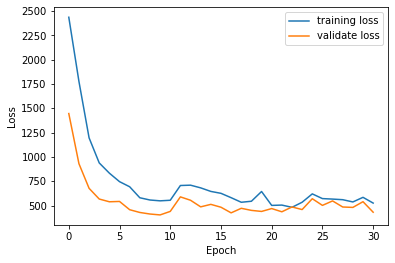

Test accuracy: 0.6843 for alpha =0.05


In [35]:
# modify your code here
# Normalize each input feature
def normalize(X):
    M = X.shape[0]
    XX = X - np.tile(np.mean(X,0),[M,1])
    XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
    return np.nan_to_num(XX, copy=True,nan=0.0)
    
X = np.matrix(data.data)
XX = normalize(X)
M,N = X.shape
idx = np.arange(0,M)

# Partion data into training and testing dataset
random.shuffle(idx)
percent_train = .6
m_train = int(M * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:M+1]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];
y_test_indices = y_indices[test_idx]

# Let's start with a 3-layer network with sigmoid activation functions,
# 6 units in layer 1, and 5 units in layer 2.

h2 = 5
h1 = 6
W = [[], np.random.normal(0,0.1,[N,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,10])]
b = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[10,1])]
L = len(W)-1

act_funcs = [None, ReLu, Sigmoid, Softmax]
act_deri = [None, ReLu_derivative, Sigmoid_derivative, Softmax]

copy_w = None
copy_b = None
loss_tol = 10
wait_iteration = 5
best_val_loss = 0
best_val_loss_idx = 0
tolerance = 30

# Train for 100 epochs with mini-batch size 1
cost_arr = [] 
val_loss_arr = []

alpha = 0.05
max_iter = 100
for iter in range(0, max_iter):
    loss_this_iter = 0
    # random index of m_train
    order = np.random.permutation(m_train)
    for i in range(0, m_train):
        # Grab the pattern order[i]
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]
        
        # Feed forward step
        a, z, delta, dW, db = forward_one_step(x_this, W, b, act_funcs)
            
        # calulate loss
        loss_this_pattern = loss(y_this, a[L])
        loss_this_iter = loss_this_iter + loss_this_pattern
        
        # back propagation
        dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)
        
        # update weight, bias
        W, B = update_step(W, b, dW, db, alpha)

    val_loss = 0
    for i in range(X_test.shape[0]):
        y_val = feed_forward(X_test[i,:].T, W, b, act_funcs) 
        y_val = np.array(y_val).flatten()
        val_loss += loss(y_test[i, :], y_val)

    print('Epoch %d train loss %f validate loss %f' % (iter, loss_this_iter[0,0], val_loss))

    if val_loss < best_val_loss or best_val_loss == 0 :
        copy_w, copy_b = copy.deepcopy(W), copy.deepcopy(b)
        best_val_loss = val_loss
        best_val_loss_idx = iter-1

    if iter>= tolerance + 1:
        if iter % wait_iteration == 0:
            alpha *= 0.5
        if val_loss > best_val_loss:
            W, b = copy_w, copy_b
            print(f'Stop training at iter: {iter}')
            print(f'Using best validation loss from epoch: {best_val_loss}')
            print(f'Train loss : {cost_arr[best_val_loss_idx]} Validate loss : {best_val_loss}')
            break

    cost_arr.append(loss_this_iter[0,0])
    val_loss_arr.append(val_loss)

xd = np.arange(len(cost_arr))
plt.plot(xd, cost_arr, label='training loss')
plt.plot(xd, val_loss_arr, label='validate loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

y_test_predicted = predict_y(W, B, X_test)
y_correct = y_test_predicted == y_test_indices
test_accuracy = np.sum(y_correct) / len(y_correct)

print('Test accuracy: %.4f for alpha =0.05' % (test_accuracy))

**Note** From 3 experiment, we tested with 3 alphas as 0.01, 0.1, 0.05 respectively.

Figure that using alpha 0.1 show that cannot convergence because of high learning rate

On the otherhand, others figures are still smooth.

## PyTorch tutorial

Is there an easier way to build this type of model? One way is to learn a framework such as TensorFlow or PyTorch. Both of these frameworks have their
pros and cons, but PyTorch is probably the most productive neural network framework for research purposes. We'll use it here.

The material for this tutorial is from
[Anand Saha's PyTorch tutorial](https://github.com/anandsaha/deep.learning.with.pytorch).

### Tensors and Tensor operations

Let's get some hands on experience with tensor creation and operations.
The torch package contains the necessary data structures to create multidimensional tensors.
It also defines the mathematical operations that can be performed on these.

In [39]:
import torch

In [40]:
print(torch.__version__)

1.12.1+cpu


### Tensor creation

Create a (2x3) dimentional Tensor.

Note that a) You get back a FloatTensor b) The values are uninitialized

In [41]:
t = torch.Tensor(2, 3)
print(t)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


The above call was equivalent to

In [42]:
t = torch.FloatTensor(2, 3)
print(t)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 9.4774e-38, 1.7730e+28]])


Inspect type of an element

In [43]:
t[0][0]

tensor(0.)

In [44]:
type(t[0][0])

torch.Tensor

Inspect `t`'s dimensions

In [45]:
print(t.size())
print(t.dim())
print(len(t.size()) == t.dim())

torch.Size([2, 3])
2
True


Set values

In [46]:
t[0][0] = 1
t[0][1] = 2
t[0][2] = 3
t[1][0] = 4
t[1][1] = 5
t[1][2] = 6
print(t)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


Let's cast a FloatTensor to IntTensor

In [47]:
t = torch.FloatTensor([1.1, 2.2])
print(t)
t.type(torch.IntTensor)

tensor([1.1000, 2.2000])


tensor([1, 2], dtype=torch.int32)

Let's explore some other ways of creating a tensor

In [48]:
# From another Tensor

t2 = torch.Tensor(t)
print(t2)

tensor([1.1000, 2.2000])


In [49]:
# From a Python list

t3 = torch.IntTensor([[1, 2],[3, 4]])
print(t3)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [50]:
# From a NumPy array

import numpy as np
a = np.array([55, 66])
t4 = torch.Tensor(a)
print(t4)

tensor([55., 66.])


In [51]:
# Create a Tensor with all zeros

t5 = torch.zeros(2, 3)
print(t5)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [52]:
# Create a Tensor with all ones

t6 = torch.ones(2, 3)
print(t6)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [53]:
# Create a Tensor with all ones with dimensions 
# of another Tensor

t7 = torch.ones_like(t4)
print(t7)

tensor([1., 1.])


### Tensor operations

Add two Tensors

In [54]:
t1 = torch.ones(2, 2)
t2 = torch.ones(2, 2)
t = t1 + t2
print(t)

tensor([[2., 2.],
        [2., 2.]])


Inplace/out-of-place operations

In [55]:
t1.add(t2)

tensor([[2., 2.],
        [2., 2.]])

In [56]:
print(t1)

tensor([[1., 1.],
        [1., 1.]])


In [57]:
t1.add_(t2)

tensor([[2., 2.],
        [2., 2.]])

In [58]:
print(t1)

tensor([[2., 2.],
        [2., 2.]])


Class methods and package functions

In [59]:
t1.cos()

tensor([[-0.4161, -0.4161],
        [-0.4161, -0.4161]])

In [60]:
torch.cos(t1)

tensor([[-0.4161, -0.4161],
        [-0.4161, -0.4161]])

A few more operations

In [61]:
# Create a one-dimensional tensor of steps equally 
# spaced points between start and end

torch.linspace(3, 10, steps=5)

tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])

In [62]:
# Create a 1-D Tensor with values from [start, end)

torch.arange(0, 5)

tensor([0, 1, 2, 3, 4])

In [63]:
# Create a (2x3) Tensor with random values sampled 
# from uniform distrubution on the interval [0,1)

torch.rand((2,3))

tensor([[0.6692, 0.4980, 0.3798],
        [0.5601, 0.9001, 0.9290]])

In [64]:
# Create a (2x3) Tensor with random values sampled 
# from normal distrubution with 0 mean and variance 1

torch.randn((2,3))

tensor([[-1.7780,  0.1324, -0.6877],
        [ 0.0472, -1.7776,  1.6679]])

In [65]:
# Do a matrix multiply

a = torch.rand((2, 3))
b = torch.rand((3, 2))

torch.mm(a, b)

tensor([[0.6225, 1.2452],
        [0.3204, 0.9925]])

### Variables

Next, let's understand variables in PyTorch and the operations we can perform on them.

In [66]:
import torch
from torch.autograd import Variable

Let's create a small computation graph

In [67]:
x = Variable(torch.FloatTensor([11.2]), requires_grad=True)
y = 2 * x

In [68]:
print(x)
print(y)

tensor([11.2000], requires_grad=True)
tensor([22.4000], grad_fn=<MulBackward0>)


In [69]:
print(x.data)
print(y.data)

tensor([11.2000])
tensor([22.4000])


In [70]:
print(x.grad_fn)
print(y.grad_fn)

None


In [71]:
y.backward() # Calculates the gradients

In [72]:
print(x.grad)
print(y.grad)

tensor([2.])
None


### Working with PyTorch and NumPy

In [73]:
import torch
import numpy as np

Convert a NumPy array to Tensor

In [74]:
n = np.array([2, 3])
t = torch.from_numpy(n)
print(n)
print(t)

[2 3]
tensor([2, 3], dtype=torch.int32)


Change a Tensor value, and see the change in 
corresponding NumPy array

In [75]:
n[0] = 100
print(t)

tensor([100,   3], dtype=torch.int32)


Convert a Tensor to NumPy array

In [76]:
t = torch.FloatTensor([5, 6])
n = t.numpy()
print(t)
print(n)

tensor([5., 6.])
[5. 6.]


Change a Tensor value, and see the change in corresponding NumPy array

In [77]:
t[0] = 100
print(n)

[100.   6.]


### Tensors on GPU

Check if your machine has GPU support

In [78]:
if torch.cuda.is_available():
    print("GPU Supported")
else:
    print("GPU Not Supported")

GPU Not Supported


Check the number of GPUs attached to this machine

In [79]:
torch.cuda.device_count()

0

Get device name

In [ ]:
torch.cuda.get_device_name(0)

Moving a Tensor to GPU

In [ ]:
t = torch.FloatTensor([2, 3])

In [ ]:
print(t)

In [ ]:
t = t.cuda(0)

Creating a Tensor on GPU, directly

In [ ]:
t = torch.cuda.FloatTensor([2, 3])
print(t)

Bring it back to CPU

In [ ]:
t = t.cpu()
print(t)

Use device context

In [ ]:
with torch.cuda.device(0):
    t = torch.cuda.FloatTensor([2, 3])
    print(t)


## MNIST digit recognition using PyTorch

This part of the lab was
taken from the [Kaggle tutorial on MNIST with PyTorch]('https://www.kaggle.com/justuser/mnist-with-pytorch-fully-connected-network).

We will use a fully connected neural network and a batch learning algorithm and explain each
step along the way.

So, with that being said, let's start with imports that we will need.
First of all, we need to import PyTorch. There are some common names for torch modules (like numpy is always named np):  torch.nn.functional is imported as F,  torch.nn is the core module, and is simply imported as nn.
Also, we need numpy. We also use pyplot and seaborn for visualization, but they are not required for the network itself. 
And finally, we use pandas for importing and transforming data.


In [80]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Now we can import and transform the data. I decided to split it into input and labels right away at this step:

In [81]:
print("Reading the data...")
data = pd.read_csv('train_mnist.csv', sep=",")
test_data = pd.read_csv('test_mnist.csv', sep=",")

print("Reshaping the data...")
dataFinal = data.drop('label', axis=1)
labels = data['label']


dataNp = dataFinal.to_numpy()
labelsNp = labels.to_numpy()
test_dataNp = test_data.to_numpy()

print("Data is ready")

Reading the data...
Reshaping the data...
Data is ready


Now that data is ready, we can take a look at what we're dealing with. I will be using heatmaps from seaborn, which is an excellent tool for matrix visualization. But first, since the images in the MNIST dataset are represented as a long 1d arrays of pixels, we will need to reshape it into 2d array. That's where .reshape() from numpy comes in handy. The pictures are 28 x 28 pixels, so these will be the parameters.

Let's select a couple random samples and visualize them. I will also print their labels, so we can compare images with their actual value:

8  /  9
8  /  4
9  /  1


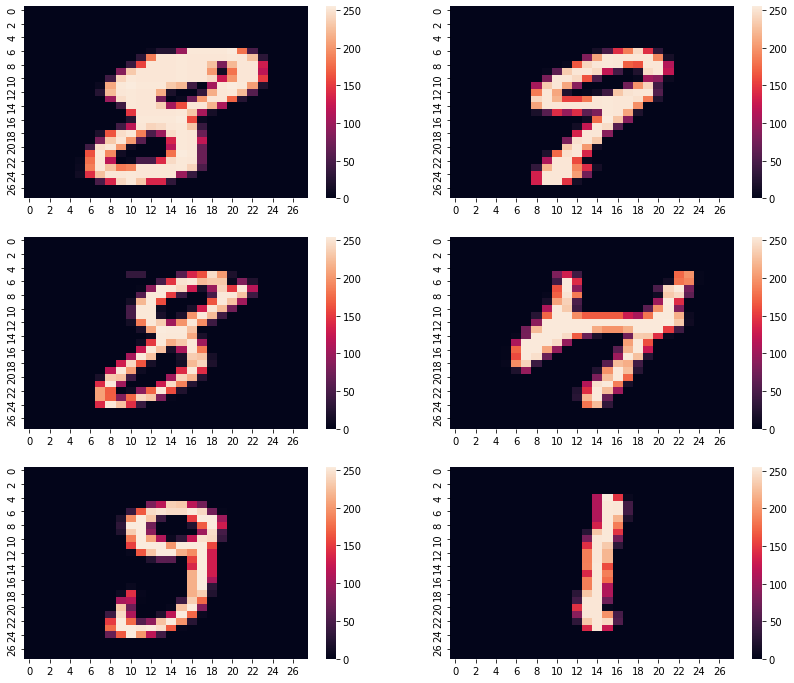

In [82]:
plt.figure(figsize=(14, 12))

pixels = dataNp[10].reshape(28, 28)
plt.subplot(321)
sns.heatmap(data=pixels)

pixels = dataNp[11].reshape(28, 28)
plt.subplot(322)
sns.heatmap(data=pixels)

pixels = dataNp[20].reshape(28, 28)
plt.subplot(323)
sns.heatmap(data=pixels)

pixels = dataNp[32].reshape(28, 28)
plt.subplot(324)
sns.heatmap(data=pixels)

pixels = dataNp[40].reshape(28, 28)
plt.subplot(325)
sns.heatmap(data=pixels)

pixels = dataNp[52].reshape(28, 28)
plt.subplot(326)
sns.heatmap(data=pixels)

print(labels[10], " / ", labels[11])
print(labels[20], " / ", labels[32])
print(labels[40], " / ", labels[52])

PyTorch has it's own way to store data - those are called tensors, and they are just like numpy arrays, but are suited for PyTorch needs. If we want to feed the data to the network, we need to transform the dataset into those tensors. The good news is that PyTorch can easily do that by transforming numpy arrays or regular lists into tensors.

In [83]:
x = torch.FloatTensor(dataNp.tolist())
y = torch.LongTensor(labelsNp.tolist())

Before we start writing the actual network, we need to determine what will be the hyperparameters. Those will not be adjusted during training, so we need to be careful how we set them up. 

Here's what we will specify:
* **input_size** - size of the input layer, it is always fixed (784 pixels)
* **output_size** - size of the output layer, also fixed size (10 for every possible digit)
* **hidden_size** - size of the hidden layer, this parameter determines structure of the network. 200 worked for me, but it is worth to play with this parameter to see what works for you
* **epochs** - how many times will the network go through the entire dataset during training. 
* **learning_rate** - determines how fast will the network learn. You should be very careful about this parameter, because if it is too high, the network won't learn at all, if it is too low, the net will learn too long. I's always about balance. Usualy 10^-3 - 10^-5 works just fine.
* **batch_size** - size of mini batches during training

In [84]:
# hyperparameters
input_size = 784
output_size = 10
hidden_size = 200

epochs = 20
batch_size = 50
learning_rate = 0.00005

Now we can finally write the actual network. To make it all work, the Network class needs to inherit the *nn.Module*, which gives it the basic functionality required, and allows PyTorch to work with it as expected. 

When writing a PyTorch neural network, some things must always be there:
* \__init\__(self) - initializes the net and creates an instance of that *nn.Module*. Here we define the structure of the network.
* forward(self, x) - defines forward propagation and how the data flow through the network. Of course, it is based on the structure that is defined in the previous function.

In the initialization, first of all, we need to initialize super (or base) module that the net inherits. After that first line, is the definition of structure. You can experiment with (put more layers or change hidden layer size, etc.), but this structure worked for me just fine.

In forward propagation we simply reassign the value of x as it flows through the layers and return the [softmax](https://en.wikipedia.org/wiki/Softmax_function) at the end.

In [85]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l3(x)
        return F.log_softmax(x)

After we've defined the network, we can initialize it. 
Also, if we "print" the instance of the net, we can see the structure of it in a neat format:

In [86]:
net = Network()
print(net)

Network(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (relu): ReLU()
  (l3): Linear(in_features=200, out_features=10, bias=True)
)


Now it's time to set up the [optimizer](http://pytorch.org/docs/master/optim.html) and a loss function. 

*There are quite a lot of things happening behind these two lines of code, so if you don't know what is going on here, don't worry too much for now, it will get clearer eventualy.* 

Optimizer is what  updates the parameters of the network. I will be using Stochastic Gradient Descent with momentum. Also, the optimizer takes the network parameters as an argument, but it's not a big deal since we can get those with .parameters() function.

I decided to use [Cross Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy) for this problem, but again, there are many options and you are free to choose whatever suits you best.

In [87]:
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

Now that everything is ready, our network can start learning. I will separate data into minibatches and feed it to the network. It has many advantages over single batch learning, but that is a different story. 

Also, I will use loss_log list to keep track of the loss function during the training process. 

In [88]:
loss_log = []

for e in range(epochs):
    for i in range(0, x.shape[0], batch_size):
        x_mini = x[i:i + batch_size] 
        y_mini = y[i:i + batch_size] 
        
        x_var = Variable(x_mini)
        y_var = Variable(y_mini)
        
        optimizer.zero_grad()
        net_out = net(x_var)
        
        loss = loss_func(net_out, y_var)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            loss_log.append(loss.item())
        
    print('Epoch: {} - Loss: {:.6f}'.format(e, loss.item()))

Epoch: 0 - Loss: 0.095379
Epoch: 1 - Loss: 0.046169
Epoch: 2 - Loss: 0.020680
Epoch: 3 - Loss: 0.012516
Epoch: 4 - Loss: 0.010482
Epoch: 5 - Loss: 0.009339
Epoch: 6 - Loss: 0.007740
Epoch: 7 - Loss: 0.007290
Epoch: 8 - Loss: 0.005948
Epoch: 9 - Loss: 0.005419
Epoch: 10 - Loss: 0.005328
Epoch: 11 - Loss: 0.004049
Epoch: 12 - Loss: 0.003589
Epoch: 13 - Loss: 0.003449
Epoch: 14 - Loss: 0.002877
Epoch: 15 - Loss: 0.002711
Epoch: 16 - Loss: 0.002603
Epoch: 17 - Loss: 0.002362
Epoch: 18 - Loss: 0.002467
Epoch: 19 - Loss: 0.002228


So, let's go line by line and see what is happening here:

This is the main loop that goes through all the epochs of training. An epoch is one full training on the full dataset.

    for e in range(epochs):
This is the inner loop that simply goes through the dataset batch by batch:

    for i in range(0, x.shape[0], batch_size):
Here is where we get the batches out of our data and simply assign them to variables for further work:

    x_mini = x[i:i + batch_size] 
    y_mini = y[i:i + batch_size] 
   These two lines are quite *important*. Remember I told you about tensors and how PyTorch stores data in them? That's not the end of story. Actually, to allow the network to work with data, we need a wrapper for those tensors called Variable. It has some additional properties, like allowing automatic gradient computation when backpropagating. It is required for the proper work of PyTorch, so we will add them here and supply tensors as parameters:
   
    x_var = Variable(x_mini)
    y_var = Variable(y_mini)
This line just resets the gradient of the optimizer:
    
    optimizer.zero_grad()
Remember the *forward(self, x)* function that we previously defined? The next line is basically calling this function and does the forward propagation:

    net_out = net(x_var)
This line computes the loss function based on predictions of the net and the correct answers:

    loss = loss_func(net_out, y_var)
Here we compute the gradient based on the loss that we've got. It will be used to adjust parameters of the network.

    loss.backward()
And here is where we finally update our network with new adjusted parameters:

    optimizer.step()
The rest is just logging, which might be helpful to observe how well the network is performing.

After the network is done with training, we can take a look at the loss function, and how it behaved during training:

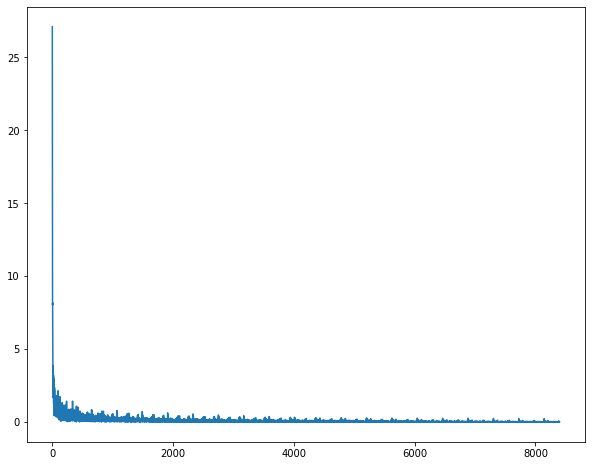

In [89]:
plt.figure(figsize=(10,8))
plt.plot(loss_log)

At this point, the network should be trained, and we can make a prediction using the test dataset. All we need to do is wrap the data into the Variable and feed it to the trained net, so nothing new here.

In [90]:
test = torch.FloatTensor(test_dataNp.tolist())
test_var = Variable(test)

net_out = net(test_var)

print(torch.max(net_out.data, 1)[1].numpy())

[2 0 9 ... 3 9 2]


Now we have out predictions that are ready to be submitted. Before that, we can take a look at predictions and compare them to the actual pictures of digits, just like at the start with training data:

Prediction: 0 / 5
Prediction: 9 / 7
Prediction: 0 / 8


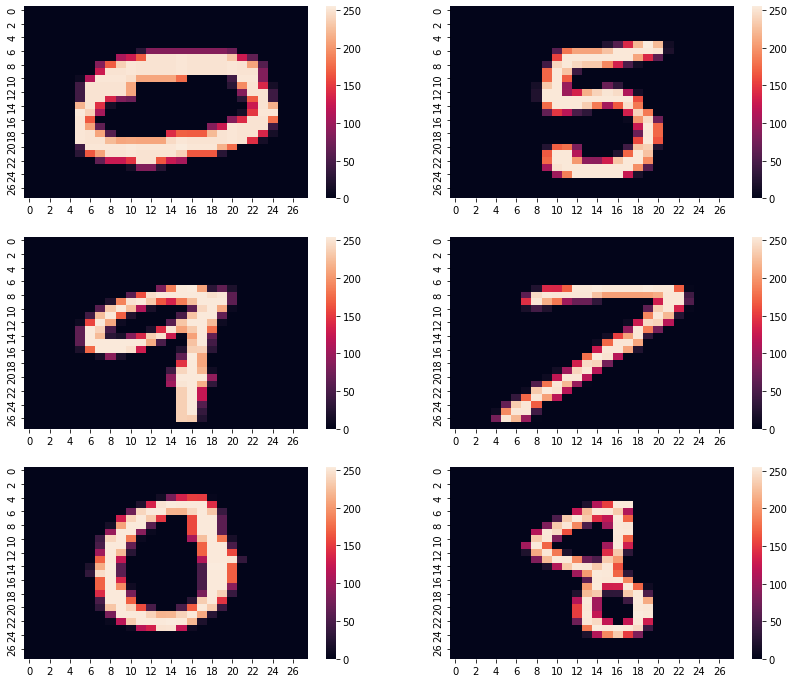

In [91]:
plt.figure(figsize=(14, 12))

pixels = test_dataNp[1].reshape(28, 28)
plt.subplot(321)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[1].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[10].reshape(28, 28)
plt.subplot(322)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[10].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[20].reshape(28, 28)
plt.subplot(323)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[20].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[30].reshape(28, 28)
plt.subplot(324)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[30].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[100].reshape(28, 28)
plt.subplot(325)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[100].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[2000].reshape(28, 28)
plt.subplot(326)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[1].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)


print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[1], torch.max(net_out.data, 1)[1].numpy()[10]))
print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[20], torch.max(net_out.data, 1)[1].numpy()[30]))
print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[100], torch.max(net_out.data, 1)[1].numpy()[2000]))

In [93]:
output = (torch.max(net_out.data, 1)[1]).numpy()
# np.savetxt("out.csv", np.dstack((np.arange(1, output.size+1),output))[0],"%d,%d",header="ImageId,Label")

And that is about it, we've made a simple neural network using PyTorch that can recognize handwritten digits. Not so bad!

When I was writing this notebook, this model scorred 96.6%, which is not perfect by any means, but it's not that bad either. 

I hope this was useful for some of you. If you are totally new to deep learning, I suggest you learn how the neural networks actually work from the inside, especially the backpropagation algorithm.

These videos explain [neural nets](https://www.youtube.com/watch?v=aircAruvnKk&t=708s) and [backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U) quite well.

Also I suggest you to take a look at this [online book](http://neuralnetworksanddeeplearning.com/chap1.html) (it's absolutely free, btw), where neural networks are explained in great detail, and it even has an implementation of the MNIST problem from scratch, using only numpy.

If you have any feedback, feel free to leave comments down below, and good luck with your deep learning adventures :)

## Take-home exercise (50 points)

Make sure you can run the PyTorch examples of MNIST classification, then apply the PyTorch example to another
classification problem you've worked with this semester, for example the breast cancer dataset. Get familiar with
working with models in PyTorch.

Report your experiments and results in your brief lab report.

In [18]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from enum import unique
import warnings
warnings.filterwarnings("ignore")

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("breast_cancer.csv")
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [20]:
X = data.drop(columns=['id','Unnamed: 32','diagnosis'])
y = data['diagnosis']
y, unique_y = pd.factorize(y)
X_columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train)
y_test_tensor = torch.FloatTensor(y_test)

# hyperparameters
input_size = X.shape[1]
output_size = 2
hidden1_size = 100

epochs = 300
batch_size = 50
learning_rate = 0.01

In [21]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        ### BEGIN SOLUTION
        self.l1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.l3 = nn.Linear(hidden1_size, output_size)
        ### END SOLUTION
        
    def forward(self, x):
        ### BEGIN SOLUTION
        x = self.l1(x)
        x = self.relu1(x)
        x = self.l3(x)
        return x
        ### END SOLUTION

In [22]:
# Continue yourself
from sklearn.preprocessing import Binarizer
net = Network()
net

Network(
  (l1): Linear(in_features=30, out_features=100, bias=True)
  (relu1): ReLU()
  (l3): Linear(in_features=100, out_features=2, bias=True)
)

In [23]:
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

loss_log = []

x = torch.FloatTensor(X_train.tolist())
y = torch.LongTensor(y_train.tolist())

for e in range(epochs):
    for i in range(0, x.shape[0], batch_size):
        x_mini = x[i:i + batch_size]
        y_mini = y[i:i + batch_size ]
        
        x_var = Variable(x_mini)
        y_var = Variable(y_mini)
        
        optimizer.zero_grad()
        net_out = net(x_var)

        loss = loss_func(net_out, y_var)
        loss.backward()
        optimizer.step()
    loss_log.append(loss.data)

    if (e+1)%50 == 0:
        print('Epoch: {} - loss {:.6f}'.format(e+1, loss.data))

Epoch: 50 - loss 0.007814
Epoch: 100 - loss 0.005736
Epoch: 150 - loss 0.003592
Epoch: 200 - loss 0.002286
Epoch: 250 - loss 0.001533
Epoch: 300 - loss 0.001060


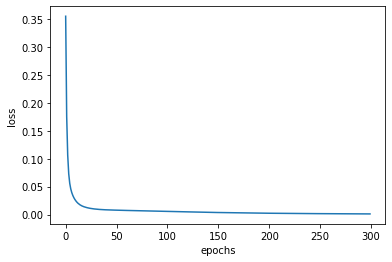

In [24]:
plt.plot(loss_log)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [25]:
#Training Set Accuracy
net_out_train = net(X_train_tensor)
pred_data = torch.max(net_out_train.data,1)[1].numpy()
accuracy = (pred_data == y_train_tensor.numpy()).sum() / pred_data.shape[0] * 100
print(f'Training accuracy : {accuracy:0.2f} %')

#Test Set Accuracy
net_out_test = net(X_test_tensor)
pred_data = torch.max(net_out_test.data,1)[1].numpy()
accuracy = (pred_data == y_test_tensor.numpy()).sum() / pred_data.shape[0] * 100
print(f'Test accuracy : {accuracy:0.2f} %')

Training accuracy : 100.00 %
Test accuracy : 97.37 %


#### Conclusion: 

Part 1 : Upload diabetes dataset

Part 2 : Setup X and Y data

- Test Train Split Data as Training set and test set

Part 3 : Train data using Nerual Network

- create Nerual Network Class
    - inside network, I use Linear ReLU Linear

- hyperparameters using
    - input_size = X.shape[1] = 30
    - output_size = 2
    - hidden1_size = 100

    - epochs = 300
    - batch_size = 50
    - learning_rate = 0.01

- Stochastic Gradient Descent (SGD) and Cross Entopy Function

- Accuracy

    Training accuracy : 100%
    
    Testing accuracy : 97.37 %

Deep Learning (Neural Network) has perform with outstanding trainging and testing accuracy.